Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.6383 - loss: 0.6798 - val_accuracy: 0.8464 - val_loss: 0.4188
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.8839 - loss: 0.3392 - val_accuracy: 0.8432 - val_loss: 0.5215
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9341 - loss: 0.2619 - val_accuracy: 0.8576 - val_loss: 0.7850
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 0.7609 - loss: 2.7838 - val_accuracy: 0.5056 - val_loss: 7.8303
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.7323 - loss: 2.4662 - val_accuracy: 0.8218 - val_loss: 1.0955
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.8856 - loss: 0.9229 - val_accuracy: 0.8282 - val_loss: 0.9408
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.9568 - loss: 0.2073 - val_accuracy: 0.7216 - val_loss: 0.9243
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.9059 - loss: 0.6548 - 

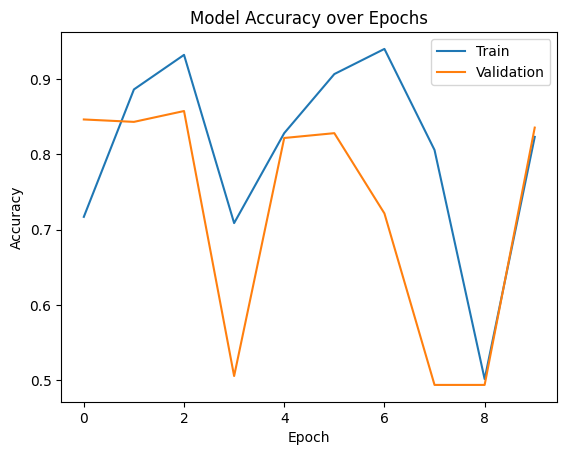

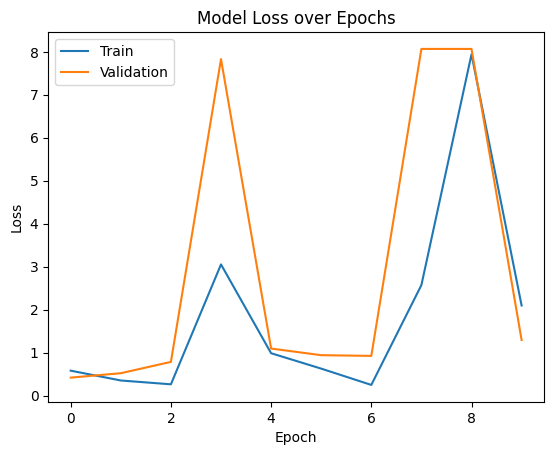

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
Predicted Sentiment: Negative


In [17]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, LSTM, Bidirectional
from tensorflow.keras.preprocessing import sequence

max_features = 87655
maxlen = 467

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)


model = Sequential()

model.add(Embedding(max_features, 32))

model.add(Bidirectional(LSTM(64)))

model.add(Dense(1, activation='relu'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=50, validation_split=0.2)

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

sample_review = x_test[0]
sample_review_input = np.expand_dims(sample_review, axis=0)
prediction = model.predict(sample_review_input)[0][0]

if prediction > 0.4:
    print("Predicted Sentiment: Positive")
else:
    print("Predicted Sentiment: Negative")